## About Dataset
Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.  

### Content  
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.  

### Acknowledgements  
This public dataset is part of Airbnb, and the original source can be found on this website: http://insideairbnb.com/.  

### Inspiration  
1. What can we learn about different hosts and areas?  
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)  
3. Which hosts are the busiest and why?  
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?  

Dataset source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- **There are multiple columns in which null values are present**

In [5]:
#Counting number of null values in each columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Null value treatment
1. Number of null values in columns "name" and "host_name" are very few so these rows can be dropped from the data.  
2. Whereas if we consider columns "last_review" and "reviews_per_month" number of null values are in large number and for required analysis these two columns are not relavant so we can drop both columns completely.

In [6]:
#Removing rows with null values
df=df.dropna(subset = ['name', 'host_name'])

In [7]:
#Dropping irrelevant columns
df = df.drop(['last_review', 'reviews_per_month'], axis=1)

In [8]:
#Again counting number of null values in each columns
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
#Number of duplicate rows in dataset
print(df.duplicated().sum())

0


- **No duplicate rows are present**

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


**From above statistics it can be observed that price mean is around 152 while maximum is 10000, it means this column has outliers also. Average number of reviews are 23.27.**

In [11]:
# Number of unique values in each column
df.nunique()

id                                48858
name                              47884
host_id                           37425
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19039
longitude                         14716
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

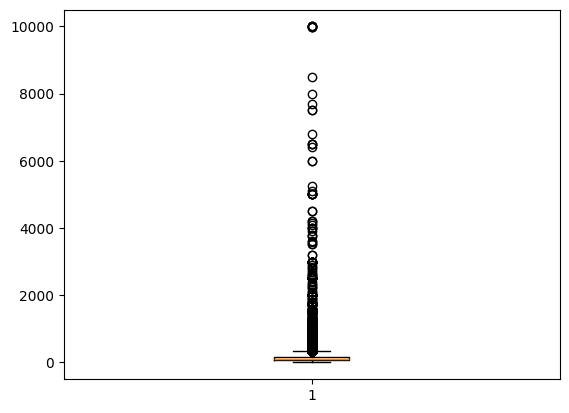

In [12]:
#Checking for outlier
plt.boxplot(df['price'])
plt.show()

Above boxplot shows that **price column contains multiple outliers**, reason behind these outliers may be that these are luxurious apartments. But for this analysis, these data points can create biasness so it is better to be removed for further analysis.

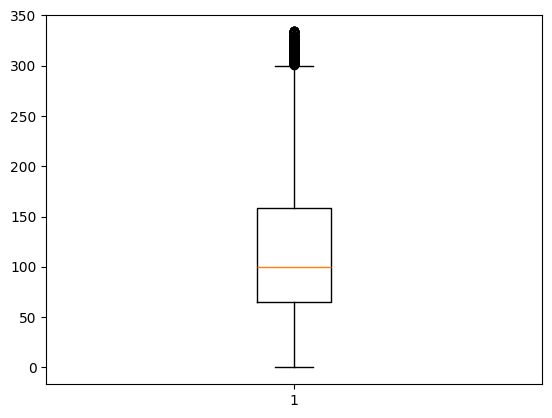

In [13]:
# Calculating Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Remove outliers
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Plot boxplot
plt.boxplot(df['price'])
plt.show()

**The above distribution is more representative**

room_type
Entire home/apt    22774
Private room       21976
Shared room         1137
dtype: int64


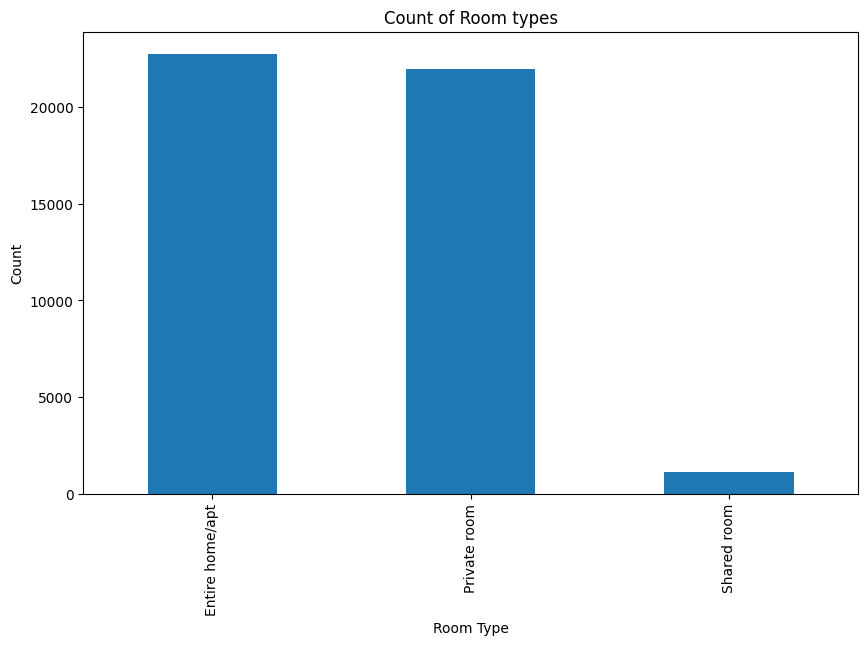

In [14]:
# Calculating total count of each room types
room_type_counts = df.groupby('room_type').size()
print(room_type_counts)

# Creating a bar plot for the same
plt.figure(figsize=(10,6))
room_type_counts.plot(kind='bar')
plt.title('Count of Room types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

neighbourhood_group
Bronx             1068
Brooklyn         19400
Manhattan        19489
Queens            5565
Staten Island      365
dtype: int64


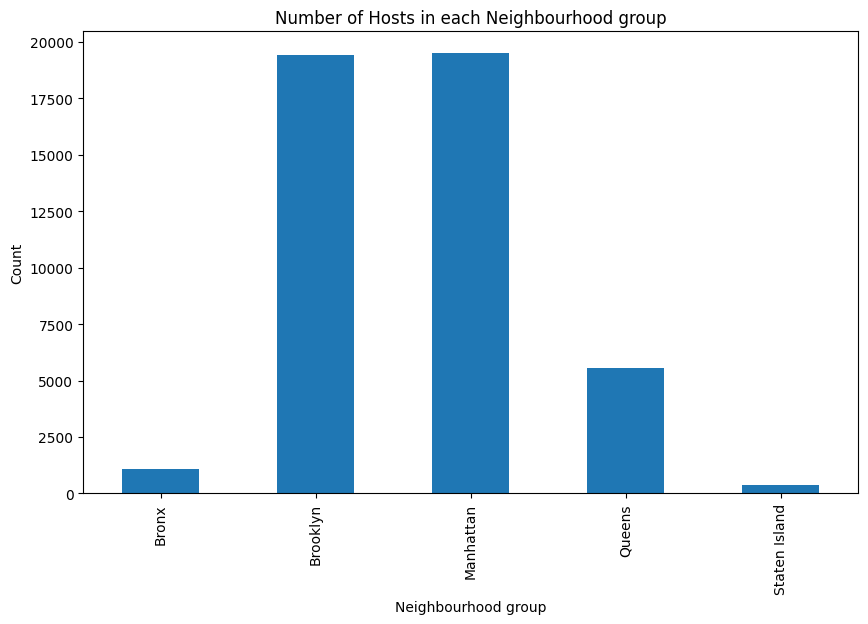

In [15]:
# Calculating total count of each neighbourhood_group
neighbourhood_group_count = df.groupby('neighbourhood_group').size()
print(neighbourhood_group_count)

# Creating a bar plot for the same
plt.figure(figsize=(10,6))
neighbourhood_group_count.plot(kind='bar')
plt.title('Number of Hosts in each Neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.show()

### Answer 1 
**Manhattan has highest number of hosts** followed by Brooklyn while **Staten Island has least number of hosts**. This is because Manhattan and Brooklyn are **densly populated urban area** whereas Staten Island is having larger land mass with less residents and it is mostly residential area. 

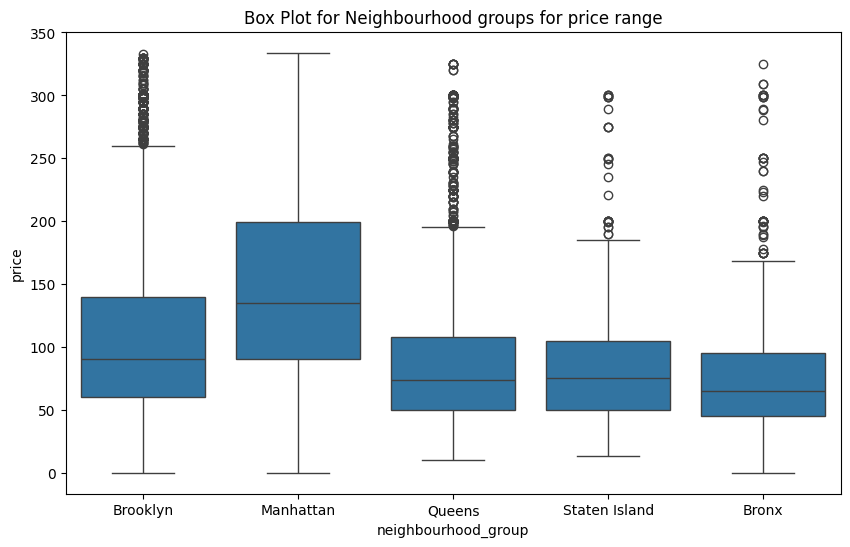

In [16]:
#Price range in different areas
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Box Plot for Neighbourhood groups for price range')
plt.show()

**Price range is highest in Manhattan followed by Brooklyn**

In [17]:
df_grouped = df.groupby(['neighbourhood', 'neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Finding top ten
top10 = df_grouped.nlargest(10, 'number_of_reviews')
print(top10)

          neighbourhood neighbourhood_group  number_of_reviews
13   Bedford-Stuyvesant            Brooklyn             108773
213        Williamsburg            Brooklyn              82399
93               Harlem           Manhattan              74735
28             Bushwick            Brooklyn              52106
94       Hell's Kitchen           Manhattan              47202
64         East Village           Manhattan              42081
61          East Harlem           Manhattan              35955
51        Crown Heights            Brooklyn              35582
201     Upper West Side           Manhattan              34258
200     Upper East Side           Manhattan              30328


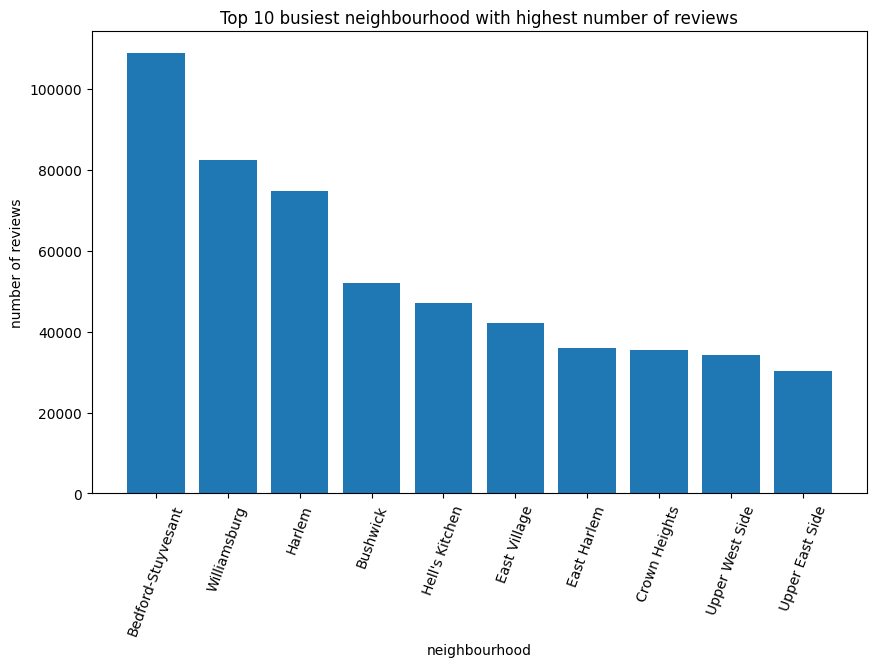

In [18]:
#Plotting graph for the same
plt.figure(figsize = (10,6))
plt.bar(top10['neighbourhood'],top10['number_of_reviews'])
plt.title("Top 10 busiest neighbourhood with highest number of reviews")
plt.xlabel("neighbourhood")
plt.ylabel("number of reviews")
plt.xticks(rotation=70)
plt.show()

### Answer 2
From above it is clear that most performing neighbourhood are either in Manhattan or in Brooklyn and this is because both are urban areas hence busiest.

In [19]:
df_grouped2 = df.groupby(['host_id', 'host_name', 'neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Finding top ten busiest hosts
top_10 = df_grouped2.nlargest(10, 'number_of_reviews')
print(top_10)

        host_id                       host_name neighbourhood_group  \
20293  37312959                            Maya              Queens   
1019     344035  Brooklyn&   Breakfast    -Len-            Brooklyn   
17745  26432133                        Danielle              Queens   
19891  35524316                    Yasu & Akiko           Manhattan   
20885  40176101                           Brady            Brooklyn   
7019    4734398                              Jj           Manhattan   
13985  16677326                  Alex And Zeena           Manhattan   
8767    6885157                           Randy            Brooklyn   
16686  23591164                          Angela              Queens   
24266  59529529                             Han           Manhattan   

       number_of_reviews  
20293               2273  
1019                2205  
17745               2017  
19891               1971  
20885               1818  
7019                1798  
13985               1355  
87

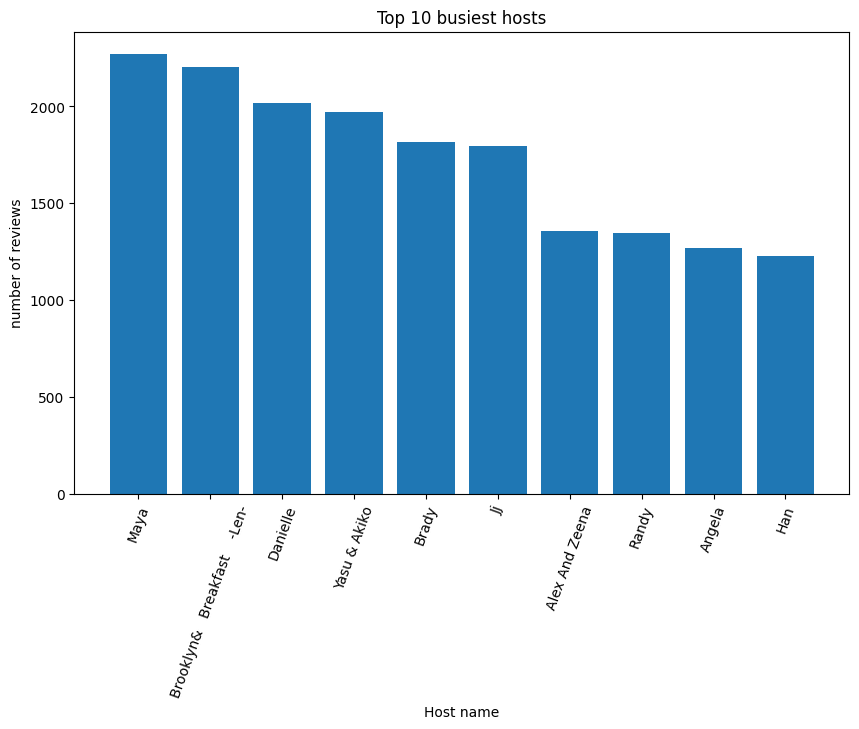

In [20]:
#Graph for top 10 busiest hosts
plt.figure(figsize = (10,6))
plt.bar(top_10['host_name'],top_10['number_of_reviews'])
plt.title("Top 10 busiest hosts")
plt.xlabel("Host name")
plt.ylabel("number of reviews")
plt.xticks(rotation=70)
plt.show()

### Answer 3 
Shown above are busiest 10 hosts. These hosts are located in densly populated urban area where their low prices attract greater number of customers.

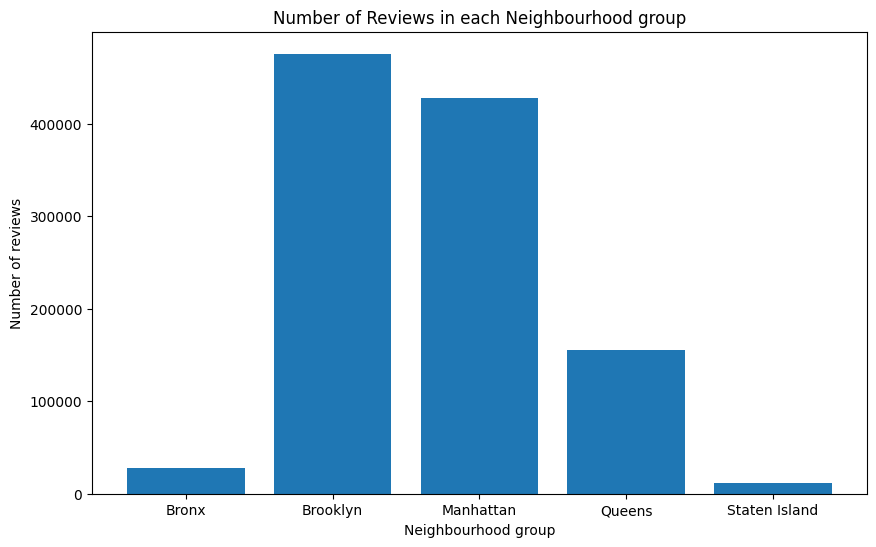

In [21]:
# Calculating total count of each neighbourhood_group
df_grouped3 = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()

# Creating a bar plot for the same
plt.figure(figsize=(10,6))
plt.bar(df_grouped3['neighbourhood_group'],df_grouped3['number_of_reviews'])
plt.title('Number of Reviews in each Neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of reviews')
plt.show()

### Answer 4
Traffic is more in Brooklyn as compared to Manhattan, which has higher number of hosts. From previous graphs it is clear that price range of Manhattan is higher as compared to Brooklyn and this is the reason more people are staying in Brooklyn as it is more affordable. while for Staten Island it is obvious because it is not a densely populated area and it is residential area.